In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
from matplotlib import pyplot as plt

In [9]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [10]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

/tmp/ipython-input-10-1491108619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [11]:
df = df[['InvoiceDate', 'Revenue']]

In [12]:
df.index = df['InvoiceDate']

In [13]:
df.drop('InvoiceDate', axis=1, inplace=True)

/tmp/ipython-input-13-4265915085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('InvoiceDate', axis=1, inplace=True)


In [14]:
df.head()

,Revenue
InvoiceDate,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


In [15]:
df.tail()

,Revenue
InvoiceDate,
2011-12-09 12:50:00,10.20
2011-12-09 12:50:00,12.60
2011-12-09 12:50:00,16.60
2011-12-09 12:50:00,16.60
2011-12-09 12:50:00,14.85


In [16]:
import seaborn as sns

In [17]:
color_pal = sns.color_palette()

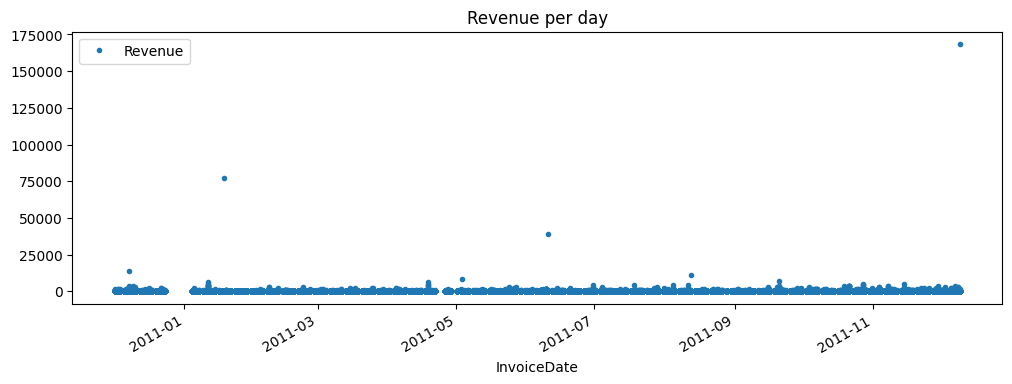

In [18]:
df.plot(style='.', figsize=(12, 4), color=color_pal[0], title='Revenue per day')
plt.show()

In [19]:
df_train = df.loc[df.index < '2011-10-01']

In [20]:
df_test = df.loc[df.index >= '2011-10-01']

In [21]:
df_train.shape[0]

362320

In [22]:
df_test.shape[0]/df.shape[0]

0.31651147699319376

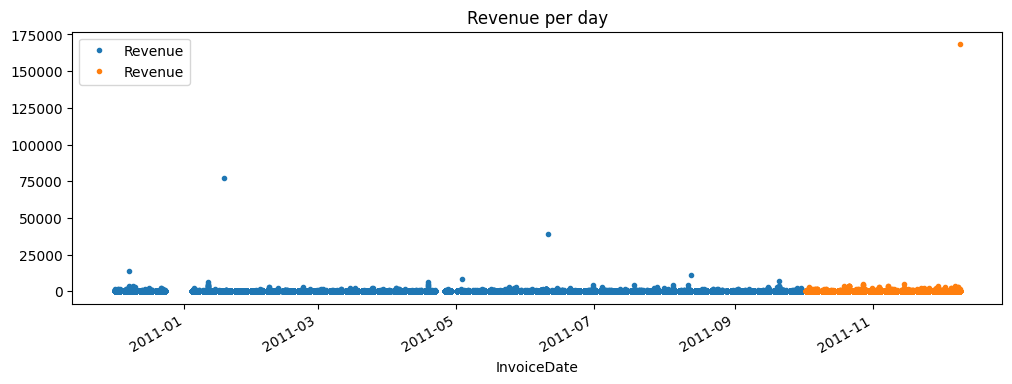

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))
df_train.plot(style='.', ax=ax, color=color_pal[0], title='Revenue per day')
df_test.plot(style='.', ax=ax, color=color_pal[1])
plt.show()

<Axes: xlabel='InvoiceDate'>

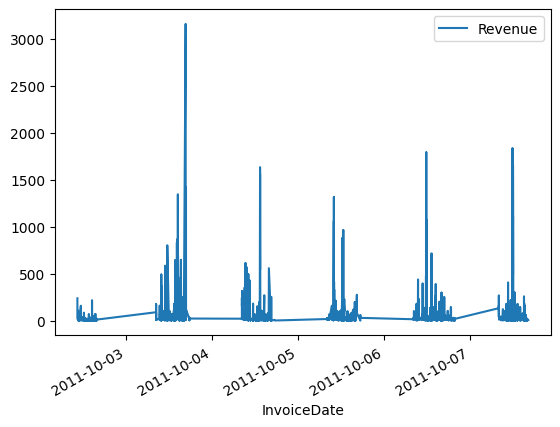

In [24]:
df.loc[(df.index >= '2011-10-01') & (df.index < '2011-10-08')].plot()

In [25]:
def create_features(df):
  df['year'] = df.index.year
  df['month'] = df.index.month
  df['day'] = df.index.day
  df['dayofweek'] = df.index.dayofweek
  df['dayofyear'] = df.index.dayofyear
  df['quarter'] = df.index.quarter
  df['hour'] = df.index.hour
  return df

In [26]:
df = create_features(df)

In [27]:
df.head()

,Revenue,year,month,day,dayofweek,dayofyear,quarter,hour
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,15.30,2010,12,1,2,335,4,8
2010-12-01 08:26:00,20.34,2010,12,1,2,335,4,8
2010-12-01 08:26:00,22.00,2010,12,1,2,335,4,8
2010-12-01 08:26:00,20.34,2010,12,1,2,335,4,8
2010-12-01 08:26:00,20.34,2010,12,1,2,335,4,8


<Axes: xlabel='hour', ylabel='Revenue'>

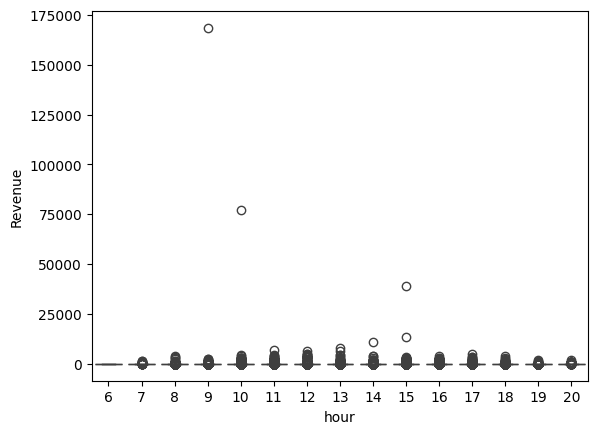

In [28]:
sns.boxplot(df, x='hour', y='Revenue')

In [29]:
df.describe()

,Revenue,year,month,day,dayofweek,dayofyear,quarter,hour
count,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000
mean,20.121871,2010.921751,7.560611,15.020922,2.436626,213.839654,2.837011,13.075623
std,270.356743,0.268563,3.508496,8.661560,1.850651,106.165294,1.136978,2.438741
min,0.001000,2010.000000,1.000000,1.000000,0.000000,4.000000,1.000000,6.000000
25%,3.750000,2011.000000,5.000000,7.000000,1.000000,126.000000,2.000000,11.000000
50%,9.900000,2011.000000,8.000000,15.000000,2.000000,237.000000,3.000000,13.000000
75%,17.700000,2011.000000,11.000000,22.000000,4.000000,312.000000,4.000000,15.000000
max,168469.600000,2011.000000,12.000000,31.000000,6.000000,357.000000,4.000000,20.000000


In [30]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
df = df[(df['Revenue'] >= lower_bound) & (df['Revenue'] <= upper_bound)]

In [32]:
df.describe()

,Revenue,year,month,day,dayofweek,dayofyear,quarter,hour
count,487453.000000,487453.000000,487453.000000,487453.000000,487453.000000,487453.000000,487453.000000,487453.000000
mean,10.474428,2010.922001,7.565000,15.032571,2.447284,213.986370,2.839613,13.138114
std,8.315532,0.268171,3.512337,8.671759,1.865944,106.296246,1.138049,2.426695
min,0.001000,2010.000000,1.000000,1.000000,0.000000,4.000000,1.000000,6.000000
25%,3.360000,2011.000000,5.000000,7.000000,1.000000,126.000000,2.000000,11.000000
50%,8.300000,2011.000000,8.000000,15.000000,2.000000,238.000000,3.000000,13.000000
75%,15.900000,2011.000000,11.000000,22.000000,4.000000,312.000000,4.000000,15.000000
max,38.520000,2011.000000,12.000000,31.000000,6.000000,357.000000,4.000000,20.000000


<Axes: xlabel='hour', ylabel='Revenue'>

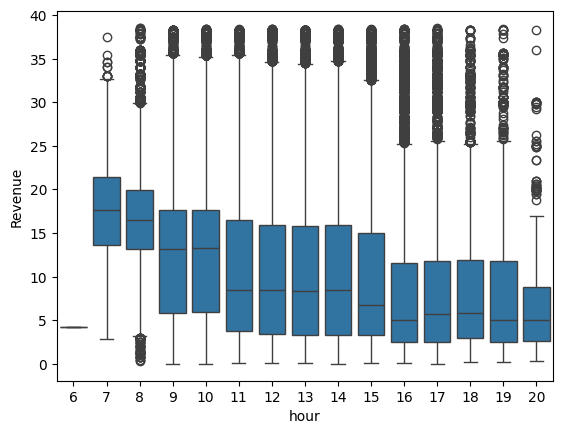

In [33]:
sns.boxplot(df, x='hour', y='Revenue')

<Axes: xlabel='month', ylabel='Revenue'>

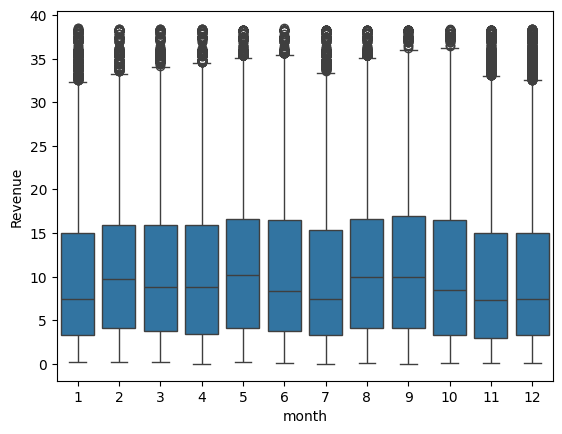

In [34]:
sns.boxplot(df, x='month', y='Revenue')

In [35]:
!pip install xgboost

In [36]:
from xgboost import XGBRegressor

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
df_train = create_features(df_train)
df_test = create_features(df_test)

In [39]:
X_train = df_train.drop('Revenue', axis=1)
y_train = df_train['Revenue']
X_test = df_test.drop('Revenue', axis=1)
y_test = df_test['Revenue']

In [40]:
reg = XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.001)

In [41]:
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:162.37613	validation_1-rmse:417.12593
[100]	validation_0-rmse:162.10046	validation_1-rmse:417.12014
[200]	validation_0-rmse:161.87289	validation_1-rmse:417.11527
[300]	validation_0-rmse:161.68470	validation_1-rmse:417.11115
[400]	validation_0-rmse:161.52509	validation_1-rmse:417.10825
[500]	validation_0-rmse:161.38809	validation_1-rmse:417.10605
[600]	validation_0-rmse:161.27410	validation_1-rmse:417.10428
[700]	validation_0-rmse:161.18132	validation_1-rmse:417.10282
[800]	validation_0-rmse:161.10157	validation_1-rmse:417.10147
[900]	validation_0-rmse:161.03321	validation_1-rmse:417.10018
[999]	validation_0-rmse:160.97521	validation_1-rmse:417.09883


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.001, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
reg.feature_importances_

array([0.01526676, 0.01056274, 0.32391605, 0.10215948, 0.06383672,
       0.        , 0.4842583 ], dtype=float32)

In [43]:
X_train.columns

Index(['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter', 'hour'], dtype='object')

In [44]:
fi = pd.DataFrame({'feature': X_train.columns, 'importance': reg.feature_importances_})

<Axes: ylabel='feature'>

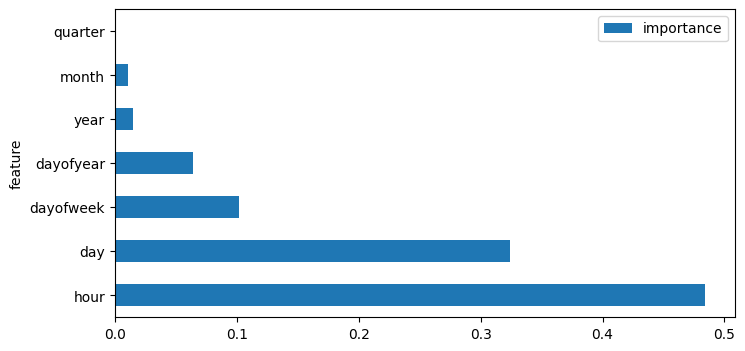

In [45]:
fi.sort_values('importance', ascending=False).plot('feature', 'importance', kind='barh', figsize=(8, 4))

In [46]:
df_test['prediction'] = reg.predict(X_test)

In [47]:
df = df.merge(df_test[['prediction']], left_index=True, right_index=True, how='left')

In [48]:
import numpy as np

In [49]:
score = np.sqrt(mean_squared_error(df_test['Revenue'], df_test['prediction']))
print(f'RMSE {score:0.2f}')

RMSE 417.10


In [50]:
df_test.head()

,Revenue,year,month,day,dayofweek,dayofyear,quarter,hour,prediction
InvoiceDate,,,,,,,,,
2011-10-02 10:32:00,237.6,2011,10,2,6,275,4,10,21.802414
2011-10-02 10:32:00,25.0,2011,10,2,6,275,4,10,21.802414
2011-10-02 10:43:00,3.4,2011,10,2,6,275,4,10,21.802414
2011-10-02 10:43:00,106.2,2011,10,2,6,275,4,10,21.802414
2011-10-02 10:43:00,19.8,2011,10,2,6,275,4,10,21.802414


In [51]:
df_test['error'] = np.abs(df_test['Revenue']-df_test['prediction'])

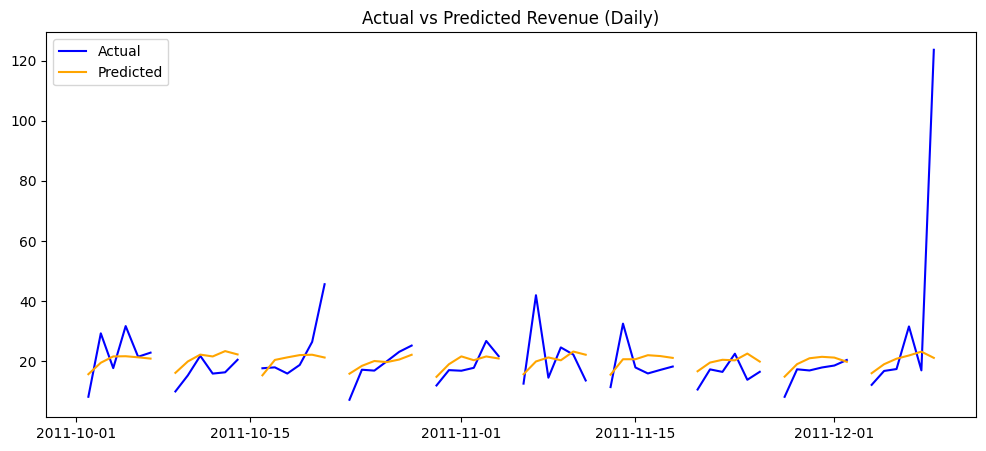

In [52]:
# Resample to daily revenue for actual and prediction
df_test_daily = df_test[['Revenue', 'prediction']].resample('D').mean()

# Plot daily revenue vs prediction
plt.figure(figsize=(12, 5))
plt.plot(df_test_daily.index, df_test_daily['Revenue'], label='Actual', color='blue')
plt.plot(df_test_daily.index, df_test_daily['prediction'], label='Predicted', color='orange')
plt.title('Actual vs Predicted Revenue (Daily)')
plt.legend()
plt.show()

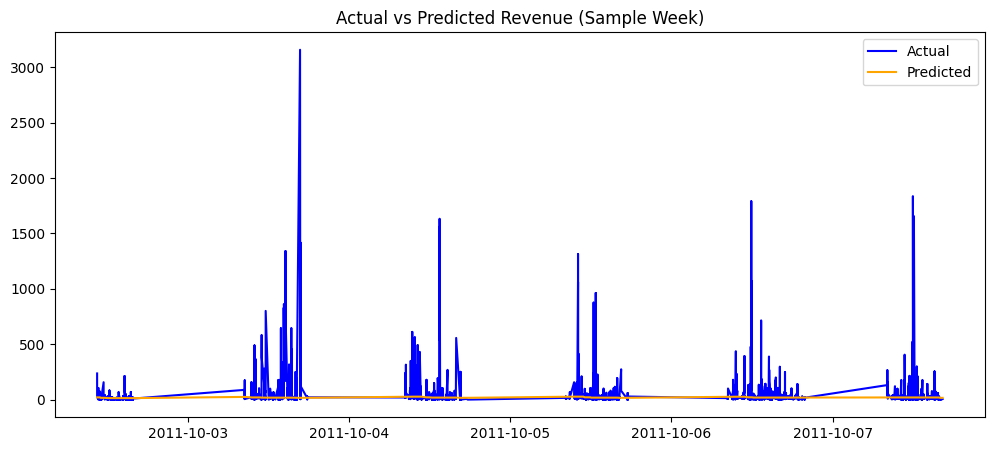

In [53]:
# Plot only 1 week of data
sample_df = df_test.loc['2011-10-01':'2011-10-07']

plt.figure(figsize=(12, 5))
plt.plot(sample_df.index, sample_df['Revenue'], label='Actual', color='blue')
plt.plot(sample_df.index, sample_df['prediction'], label='Predicted', color='orange')
plt.title('Actual vs Predicted Revenue (Sample Week)')
plt.legend()
plt.show()

In [54]:
print(df_test.index.is_monotonic_increasing)
print(df_test.index.duplicated().sum())  # should be 0

True
162645


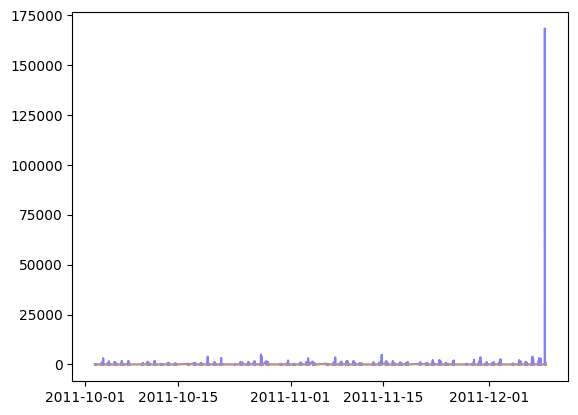

In [55]:
plt.plot(df_test.index, df_test['Revenue'], label='Actual', color='blue', alpha=0.5)
plt.plot(df_test.index, df_test['prediction'], label='Predicted', color='orange', alpha=0.5)